In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fourths = pd.read_csv('results/perturbation_results.csv')

In [5]:
eighths = pd.read_csv('results/perturbation_results_eighths.csv')

In [4]:
fourths.head()

,Unnamed: 0,p,logDI_train,logDI_test
0,0,0.0,25.3993,36.212228
1,1,0.0,25.3993,36.212228
2,2,0.0,25.3993,36.212228
3,3,0.0,25.3993,36.212228
4,4,0.0,25.3993,36.212228


In [5]:
eighths.head()

,Unnamed: 0,p,logDI_train,logDI_test
0,0,0.125,15.704227,41.088204
1,1,0.125,15.613400,38.412525
2,2,0.125,16.740273,41.261976
3,3,0.125,15.157190,40.886355
4,4,0.125,15.306276,40.768843


In [6]:
frames = [fourths, eighths]
pert_results = pd.concat(frames)

In [7]:
pert_results.to_csv('results/perturbation_results_concat.csv')

In [8]:
pert_results = pd.read_csv('results/perturbation_results_concat.csv')

In [9]:
groupby_p = pert_results.groupby('p').agg(np.mean)

In [10]:
groupby_p.head()

,Unnamed: 0,Unnamed: 0.1,logDI_train,logDI_test
p,,,,
0.000,12,12,25.399300,36.212228
0.125,12,12,15.380144,40.426093
0.250,37,37,9.166004,41.972126
0.375,37,37,5.772560,41.576453
0.500,62,62,3.255663,37.628143


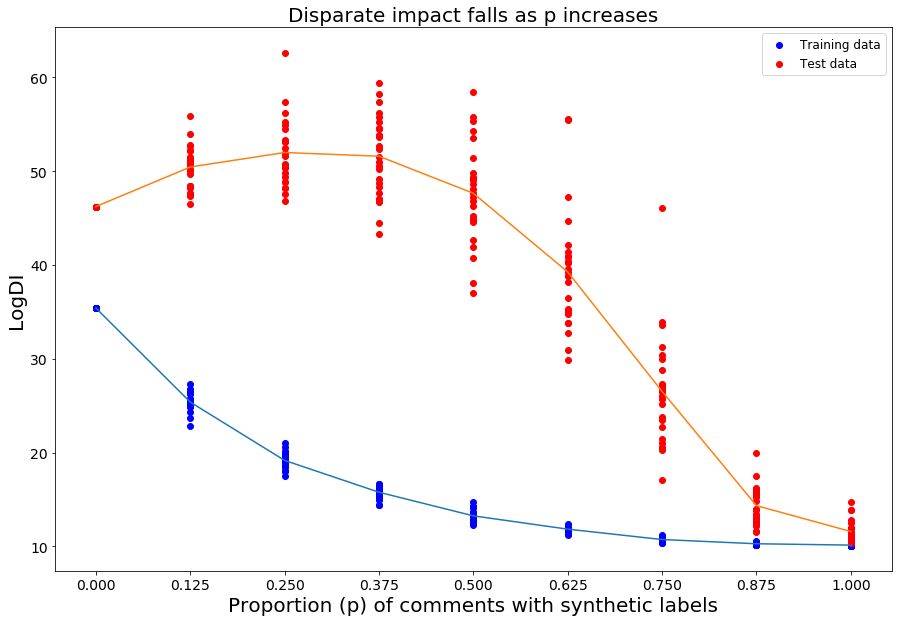

In [13]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(pert_results['p'], pert_results['logDI_train'], c='b', label='Training data')
# z_train = np.polyfit(pert_results['p'], pert_results['logDI_train'], 1)
# p_train = np.poly1d(z_train)
# ax1.plot(pert_results['p'], p_train(pert_results['p']), "b--")

ax1.scatter(pert_results['p'], pert_results['logDI_test'], c='r', label='Test data')
# z_test = np.polyfit(pert_results['p'], pert_results['logDI_test'], 1)
# p_test = np.poly1d(z_test)
# ax1.plot(pert_results['p'], p_test(pert_results['p']), "r--")

ax1.plot(groupby_p.logDI_train, label='_nolegend_')
ax1.plot(groupby_p.logDI_test, label='_nolegend_')

plt.xticks([float(x)/1000 for x in range(0,1125,125)], fontsize=14)
ax1.set_yticklabels(np.arange(0, 70, 10), fontsize=14)
plt.title("Disparate impact falls as p increases", fontsize=20)
plt.xlabel("Proportion (p) of comments with synthetic labels", fontsize=20)
plt.ylabel("LogDI", fontsize=20)
plt.legend(fontsize=12)
plt.savefig('figures/perturbations_graph1206.png', bbox_inches='tight')

plt.show()

In [38]:
[float(x)/1000 for x in range(0,1125,125)]

[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]

In [3]:
pert_results.head()

,Unnamed: 0,p,logDI_train,logDI_test
0,0,0.0,25.3993,36.212228
1,1,0.0,25.3993,36.212228
2,2,0.0,25.3993,36.212228
3,3,0.0,25.3993,36.212228
4,4,0.0,25.3993,36.212228


In [14]:
pert_results[(pert_results.p > 0) & (pert_results.p < 1)].head()

,Unnamed: 0,p,logDI_train,logDI_test
25,25,0.25,10.620912,45.219664
26,26,0.25,9.266180,38.871566
27,27,0.25,9.370124,40.584482
28,28,0.25,8.516764,44.906993
29,29,0.25,9.694544,39.790125


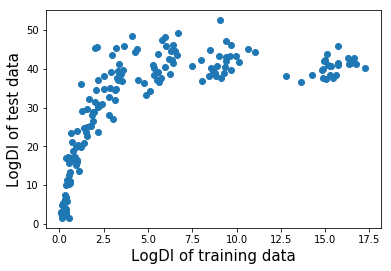

In [19]:
plt.figsize=(15,10)
plt.scatter(pert_results[(pert_results.p > 0) & (pert_results.p < 1)].logDI_train, \
            pert_results[(pert_results.p > 0) & (pert_results.p < 1)].logDI_test)

# plt.title("", fontsize=20)
plt.xlabel("LogDI of training data", fontsize=15)
plt.ylabel("LogDI of test data", fontsize=15)
plt.savefig('figures/logDItrainvstest', bbox_inches='tight')

plt.show()

In [24]:
pert_results.p.unique()[1:len(pert_results.p.unique()-1)]

array([0.25 , 0.5  , 0.75 , 1.   , 0.125, 0.375, 0.625, 0.875])

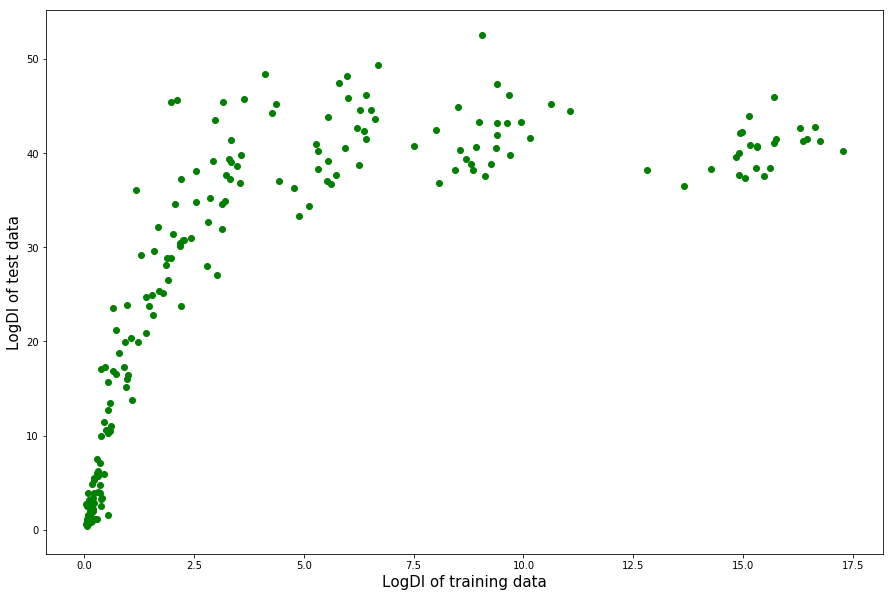

In [29]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

for i in pert_results.p.unique()[1:len(pert_results.p.unique()-1)]:
    ax1.scatter(pert_results[pert_results.p==i].logDI_train, pert_results[pert_results.p==i].logDI_test, c="g")    
    
# ax1.scatter(pert_results[pert_results.p==0.25].logDI_train, pert_results[pert_results.p==0.25].logDI_test, \
#            label="p = 0.25")
# ax1.scatter(pert_results[pert_results.p==0.50].logDI_train, pert_results[pert_results.p==0.50].logDI_test, \
#            label="p = 0.50")
# ax1.scatter(pert_results[pert_results.p==0.75].logDI_train, pert_results[pert_results.p==0.75].logDI_test, \
#            label="p = 0.75")

# plt.title("", fontsize=20)
plt.xlabel("LogDI of training data", fontsize=15)
plt.ylabel("LogDI of test data", fontsize=15)
# plt.legend()

plt.savefig('figures/logDItrainvstest_moredata.png', bbox_inches='tight')
plt.show()